In [1]:
import pandas as pd # importing the pandas module
import numpy as np # importing numpy modeule for mathematical operation
import matplotlib.pyplot as plt # importing matplotlib library to plt the graphs

In [2]:
df=pd.read_excel('/content/Player_Activity_Data.xlsx',header=[1]) # importing the Player_Activity_Data.xlsx file into the code
df=df.drop(['Unnamed: 0'],axis='columns') # dropping the first row
df.head(5) # checking first 5 rows of data

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
1,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
2,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
3,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
4,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616


In [3]:
pip install pandasql # imported this for manipulating and cleaning the data

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=2a4102aa30363da33b2818faa0dd6bcb597a62f0d199d71a859522bba4fa572a
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [7]:
pip install sqldf # imported this for writing the sql queries for the Data Frames

In [4]:
from pandasql import sqldf
output = sqldf("select src_player_id,Product,SubProduct,SUM(Bet_Amount) AS Bet_Amount,SUM(Win_Amount) AS Win_Amount,SUM(Gross_Win) AS Gross_Win,SUM(Net_Gross_Win) AS Net_Gross_Win from df GROUP BY 1,2,3")
output.head(5)

,src_player_id,Product,SubProduct,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,12329393,eGaming,Non Table Games,0.0,0.00,0.0000,0.000000
1,12329407,eGaming,Non Table Games,63.0,43.20,19.1763,16.108092
2,12329630,eGaming,Table Games,76.5,51.50,25.0000,21.000000
3,12329932,eGaming,Non Table Games,26.0,6.65,19.0926,16.037784
4,12329942,SportsBook,Prematch,100.0,0.00,100.0000,84.000000


In [9]:
from sklearn.preprocessing import LabelEncoder # scaling down the data by preprocessing
from sklearn.cluster import KMeans # importing the k means clustering algorithm
output['src_player_id_n']=LabelEncoder().fit_transform(output['src_player_id']) # scaling down the player id columns
output['Product_n']=LabelEncoder().fit_transform(output['Product']) # scaling down the product columns
output['SubProduct_n']=LabelEncoder().fit_transform(output['SubProduct']) # scaling down the subproduct column
# Normalizing the scales
output_n=output.drop(['src_player_id','Product','SubProduct'],axis='columns') # Dropping the existing columns and new columns are taken into consideration
output_n.head(5) # extracting the first 5 rows of data

,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,src_player_id_n,Product_n,SubProduct_n
0,0.0,0.00,0.0000,0.000000,0,4,6
1,63.0,43.20,19.1763,16.108092,1,4,6
2,76.5,51.50,25.0000,21.000000,2,4,8
3,26.0,6.65,19.0926,16.037784,3,4,6
4,100.0,0.00,100.0000,84.000000,4,3,7


In [10]:
k_range=range(1,10) # Considering k values from 1 to 10
sse = [] # creating the empty list
for k in k_range: # Iterating the for loop from k= 1-10 values 
    km=KMeans(n_clusters=k)
    km.fit(output[['src_player_id_n','Product_n','SubProduct_n','Bet_Amount','Win_Amount','Gross_Win','Net_Gross_Win']]) # fitting the data to the k means clustering algorithm
    sse.append(km.inertia_) # appending the sum of squared error values to the above created empty list

print(sse)    # printing the sum of squared values

[8401320701040480.0, 4548976363055173.0, 2900682046955642.0, 1981210997812687.2, 1360144504996377.0, 907802711677199.9, 690345729147895.2, 573892620866315.8, 476369503984891.2]


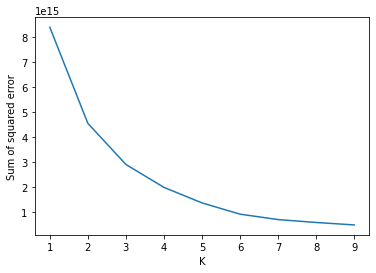

In [11]:
plt.xlabel('K') # considering k values on x- axis
plt.ylabel('Sum of squared error') # considering sum of squared values on Y-axis 
plt.plot(k_range,sse) #plotting the k & sum of square values using matplotlib

In [13]:
km=KMeans(n_clusters=3) #predicting the cluisters based upon the given inputs
km
predicted=km.fit_predict(output[['src_player_id_n','Product_n','SubProduct_n','Bet_Amount','Win_Amount','Gross_Win','Net_Gross_Win']])
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
output['cluster']=predicted # created the cluster column which states the particular customer belongs which cluster 
output.head(10) # extarcting the 10 rows of sample data

,src_player_id,Product,SubProduct,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,src_player_id_n,Product_n,SubProduct_n,cluster
0,12329393,eGaming,Non Table Games,0.000000,0.00,0.0000,0.000000,0,4,6,0
1,12329407,eGaming,Non Table Games,63.000000,43.20,19.1763,16.108092,1,4,6,0
2,12329630,eGaming,Table Games,76.500000,51.50,25.0000,21.000000,2,4,8,0
3,12329932,eGaming,Non Table Games,26.000000,6.65,19.0926,16.037784,3,4,6,0
4,12329942,SportsBook,Prematch,100.000000,0.00,100.0000,84.000000,4,3,7,0
5,12329956,SportsBook,Livebook,205.000000,28.73,176.2700,148.066800,5,3,1,0
6,12329956,SportsBook,Prematch,2172.830000,3332.10,-1159.2700,-968.986800,5,3,7,0
7,12329998,eGaming,Non Table Games,279.800000,187.05,91.6016,76.945344,6,4,6,0
8,12329998,eGaming,Table Games,0.000000,0.00,0.0000,0.000000,6,4,8,0
9,12330018,Lottery,Lucky Six,1293.340002,898.00,395.3400,332.085600,7,1,3,0


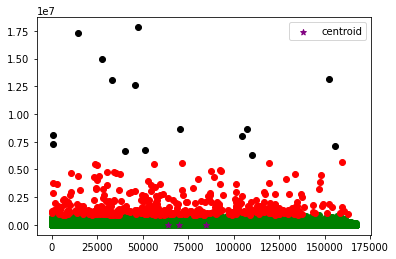

In [27]:
output1 = output[output.cluster == 0]
output2 = output[output.cluster == 1]
output3 = output[output.cluster == 2]
output4 = output[output.cluster == 3]

plt.scatter(output1['src_player_id_n'],output1['Bet_Amount'],color='green')
plt.scatter(output2['src_player_id_n'],output2['Bet_Amount'],color='red')
plt.scatter(output3['src_player_id_n'],output3['Bet_Amount'],color='black')
plt.scatter(output4['src_player_id_n'],output4['Bet_Amount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [20]:
from pandasql import sqldf
output = sqldf("select SUM(Net_Gross_Win) AS Net_Gross_Win from df ")
output # Extracting the total Net_Gross_Win for further computations

,Net_Gross_Win
0,1.110392e+08


In [21]:
output = sqldf("select COUNT(DISTINCT(src_player_id)) AS purchases from df WHERE Bet_Amount >0")
output # Extracting the unique customers where the bet_mount is greater than zero for further computations

,Net_Gross_Win
0,153359


In [22]:
output = sqldf("select SUM(ActivePlayerDays) AS ActivePlayerDays from df ")
output #Extracting the sum of all ActivePlayerDays for further computations

,ActivePlayerDays
0,5464261
